In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('fivethirtyeight')

In [28]:
end = datetime.now() 
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [3]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,


In [4]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,


In [ ]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Adj Close,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Close,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,BTC-USD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  0 non-null      float64
 1   (Close, BTC-USD)      0 non-null      float64
 2   (High, BTC-USD)       0 non-null      float64
 3   (Low, BTC-USD)        0 non-null      float64
 4   (Open, BTC-USD)       0 non-null      float64
 5   (Volume, BTC-USD)     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0 bytes


In [7]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
#Close price data
closing_price = stock_data[['Close']]

In [9]:
closing_price['Close']

Ticker,BTC-USD
Date,


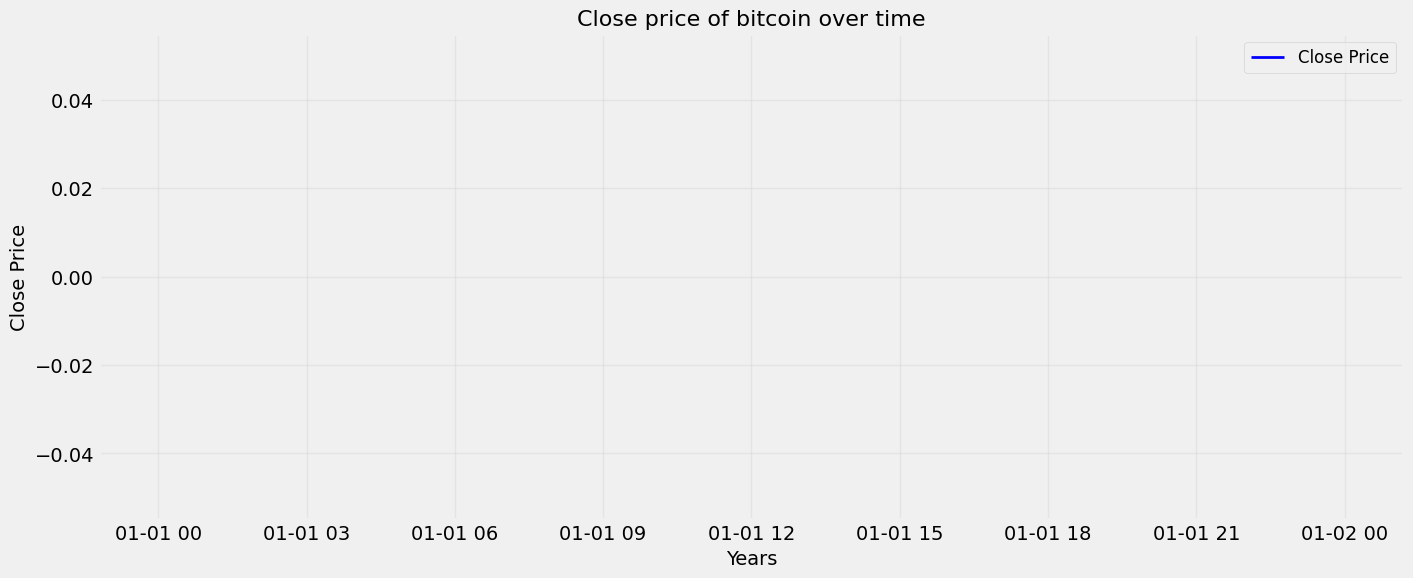

In [10]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 0
2015 0
2016 0
2017 0
2018 0
2019 0
2020 0
2021 0
2022 0
2023 0


In [ ]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

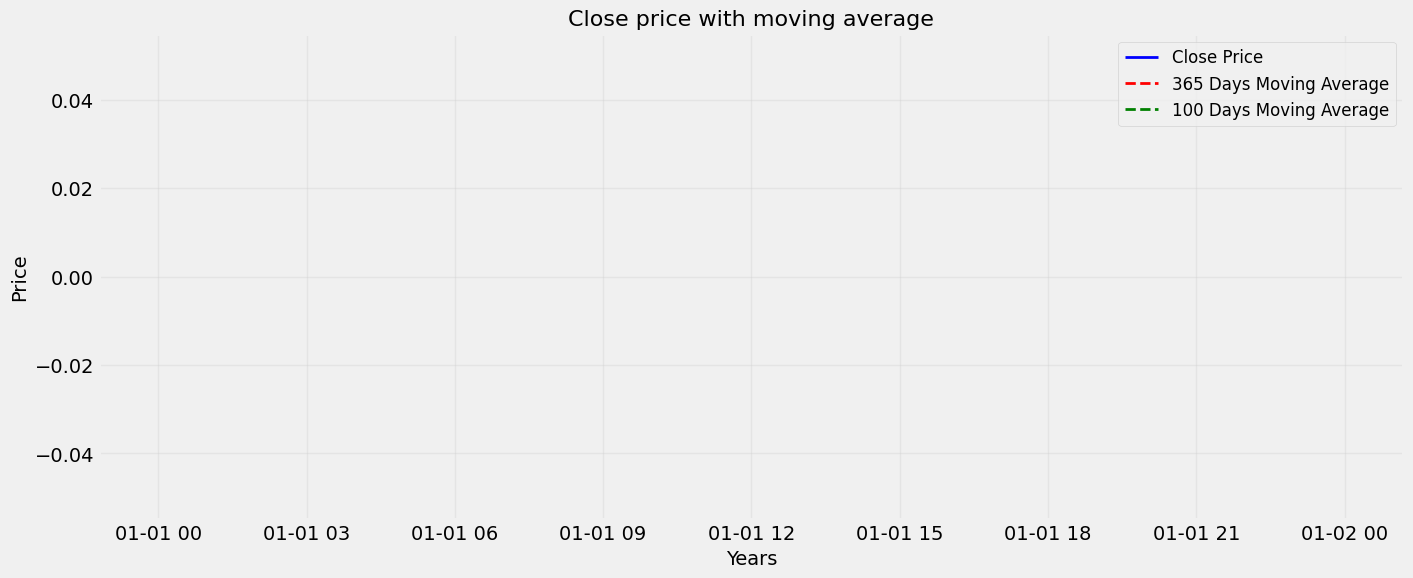

In [16]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [17]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [18]:
len(scaled_data)

3785

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [20]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [21]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [22]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

d:\coding\smester-5\machine learning\predict-btc\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - loss: 0.0021
Epoch 2/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - loss: 4.0894e-04
Epoch 3/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 1.5301e-04
Epoch 4/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 1.7963e-04
Epoch 5/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - loss: 1.4366e-04
Epoch 6/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - loss: 1.2534e-04
Epoch 7/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 1.8749e-04
Epoch 8/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - loss: 1.0825e-04
Epoch 9/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - loss: 9.7437e-05
Epoch 10/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - loss: 1.1390e-04


In [24]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


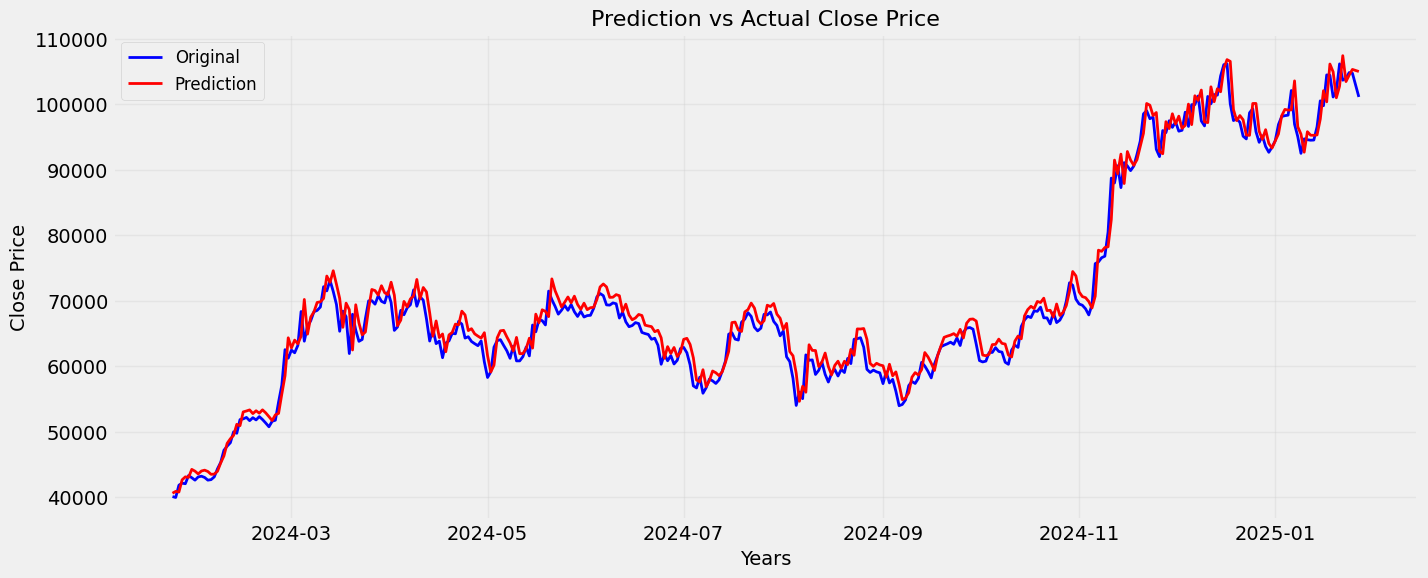

In [25]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [26]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [27]:
future_predictions

[array([[100670.69]], dtype=float32),
 array([[100987.516]], dtype=float32),
 array([[101426.59]], dtype=float32),
 array([[101930.46]], dtype=float32),
 array([[102472.83]], dtype=float32),
 array([[103036.36]], dtype=float32),
 array([[103606.89]], dtype=float32),
 array([[104171.36]], dtype=float32),
 array([[104717.875]], dtype=float32),
 array([[105236.516]], dtype=float32)]

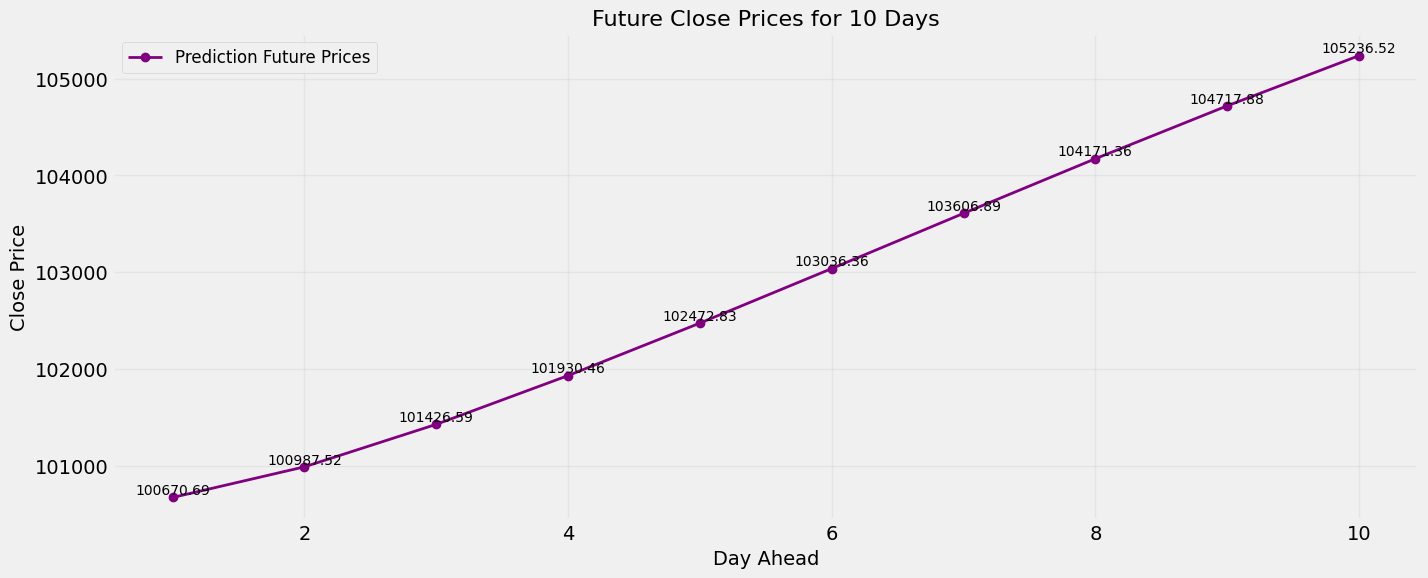

In [28]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [29]:
model.save("model.keras")